# King County Home Sales Analysis

- **Authors:** Kevin Culver
***

## Overview

## Business Problem


## Data Understanding

### Importing Relevant Modules and Datasets

In [67]:
#importing relevant modules
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [4]:
#loading dataset and column names
df = pd.read_csv('./data/kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data Preparation

To begin the data cleaning process, the data was observed broadly to understand the data. Specifically I wanted to learn more about the following:
1. To see if any columns could be dropped due to irrelevance to the business question.
2. To understand what types of data types were within each column and if these needed to be changed.
3. To learn what columns had missing values, improper formatting, or placeholders. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [68]:
#checking each columns most common values to check for placeholders/outliers
for col in df.columns:
    if col:
        try:
            print(col, df[col].value_counts()[:5])
        except:
            print(col, df[col].value_counts())
    print('\n')


id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: int64


floors 1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int

### Data Cleaning

#### Dropping Irrelevant Columns

Based on preliminary investigation of the data, several columns were dropped. 

The removed columns include: *date, waterfront, view, lat, long, sqft_lot15, sqft_living15, sqft_above, and sqft_basement*.

These columns were removed for the following reasons:
* <u>*date*</u> refers to when the the home was added to the database and is not relevant for analysis.
* <u>*waterfront*</u> and <u>*view*</u> were removed since they deal with attributes of a property that cannot be changed or renovated.
* <u>*lat*</u> and <u>*long*</u> were removed since the global coordiantes of a house did not seem relevant to the current business question. It is also an attribute of a home that cannot be changed. 
* <u>*sqft_above*</u>, <u>*sqft_lot15*</u>, <u>*sqft_living15*</u>, and <u>*sqft_basement*</u> were redundant categories which are better represented in the columns <u>*sqft_living*</u> and <u>*sqft_lot*</u>.

In [7]:
#dropping irrelevant columns
dropped_columns = ['date', 'waterfront', 'view', 'lat', 'long', 'sqft_lot15', 
                  'sqft_living15','sqft_above', 'sqft_basement']

df.drop(dropped_columns, axis=1, inplace=True)

#### Dealing with Null Values

The *yr_renovated* column is the only columns that has null values (3842 to be exact). This is a large number and accounts for 17% of the 21,597 entries.

When looking at the data, 0.00 also seems to be a placeholder for homes that have not been renovated. This placeholder accounts for 17,011 entries. When combined, these null values/placeholders account for 20,853 out of the 21,597 entries. 

Since it may still be useful to know whether or not a home was renovated, *yr_renovated* was transformed into a categorical variable *renovated_cat* that applied 1's to homes that had been renovated after 2005 (last 10 years of the dataset) and applied 0's to homes that were either not renovated or renovated before 2005. After this, the *yr_renovated* column was dropped.

In [8]:
#detecting which columns have null/missing values
df.isna().sum()

id                 0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
condition          0
grade              0
yr_built           0
yr_renovated    3842
zipcode            0
dtype: int64

In [9]:
#observing minimum and maximum values to look for potential placeholders
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,zipcode
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,17755.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676,83.636778,98077.951845
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234,399.946414,53.513072
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000,0.000000,98001.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000,0.000000,98033.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000,0.000000,98065.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000,0.000000,98118.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000,2015.000000,98199.000000


In [10]:
#filling na values with 0.00 and creating a new categorical column
df['renovated_cat'] = df['yr_renovated'].fillna(0.00)

In [11]:
#new column accounts for homes that were a.) renovated and b.) renovated in
#the last 10 years (2005 or later)
df['renovated_cat'] = df['renovated_cat'].map(lambda x: 1 if x > 2005 else 0)

df['renovated_cat'].value_counts()

0    21361
1      236
Name: renovated_cat, dtype: int64

In [12]:
#dropping yr_renovated since it is no longer needed
df.drop('yr_renovated', axis=1, inplace=True)

#### Transforming and Normalizing Continous Data

With the data mostly clean, the variables are visualized using histograms. These visualizations help to assess whether variables are categorical or continuous. The visualizations also aid in determining whether or not the continuous variables are normally distributed or skewed. 

In the case of the data below, most of the continuous variables are positively skewed with some extreme outliers positioned to the right of the graph. The positive skew is particularly apparent with *sqft_lot*, *price*, and *sqft_living*. With such a strong skew, the residuals are bound to be problematic for linear regression. 

Since the majority of continuous variables are non-normal and heavily skewed, it was decided to log transform these variables so that each variable would approach normality. After the log transform, the variables were also normalized.

Looking at the first set of histograms compared to the last set of histograms(after they were transformed and normalized), the variables appear much more normally distributed and follow a discernible bell-shaped pattern. These transformations allow the data to fulfill the assumption of normality for linear regressions.

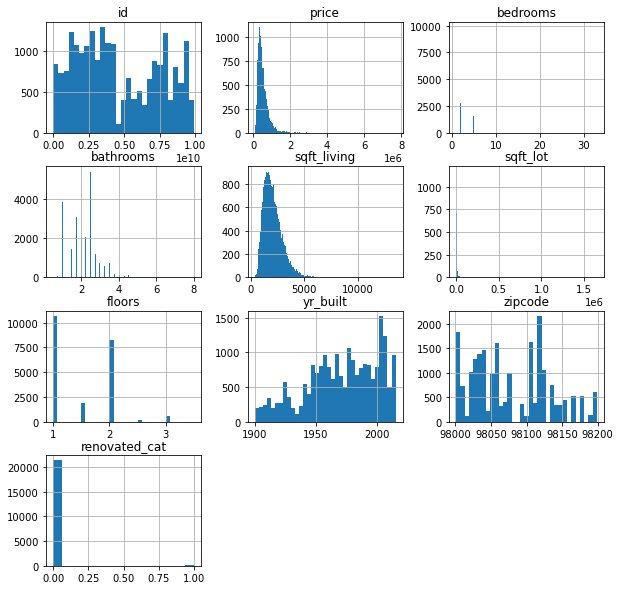

In [27]:
#using visualizations to determine if columns continuous or categorical
#also to check if data is skewed or not and in need of transformations
df.hist(figsize=[10, 10], bins='auto');

In [17]:
#only sqft_living, sqft_lt, pric, and yr_built are continuous

#splitting columns into categorical or cont variables
cont = ['price', 'sqft_living', 'yr_built', 'sqft_lot']
categ = ['bedrooms', 'bathrooms', 'zipcode', 'floors', 'renovated_cat', 'grade',
        'condition']

df['price'] = df['price']
df_cont = df[cont]
df_categ = df[categ]


In [28]:
#normalizing function
def normalizer(series):
    return (series-series.mean())/series.std()
#applying normalizing function to non-log transformed data
df_cont_baseline = df_cont.apply(normalizer)

#log transforming and normalizing data
df_cont_log = np.log(df_cont)
df_log_norm = df_cont_log.apply(normalizer)

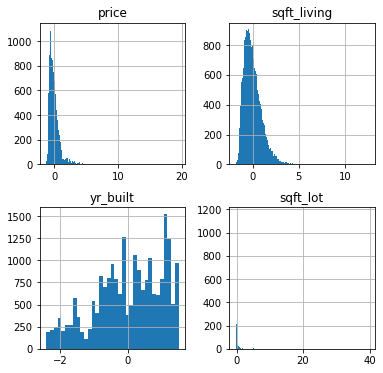

In [29]:
df_cont_baseline.hist(figsize=[6,6], bins='auto');

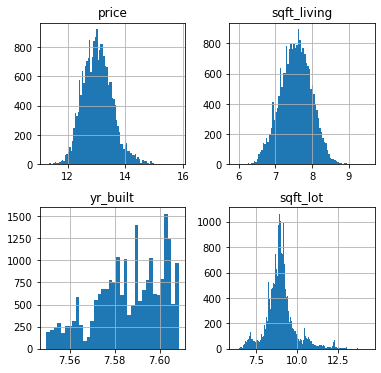

In [24]:
df_cont_log.hist(figsize=[6, 6], bins='auto');

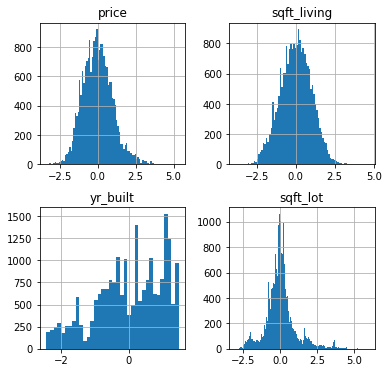

In [25]:
df_log_norm.hist(figsize=[6, 6], bins='auto');

#### One-Hot Encoding Categorical Data

In [31]:
categ_dummies = pd.get_dummies(df_categ, drop_first=True)

#### Combining Features for Preproccessed Dataframe and Baseline Dataframe (non-log transformed data)


In [70]:
preprocessed = pd.concat([df_log_norm, categ_dummies], axis=1)
baseline_scaled = pd.concat([df_cont_baseline, categ_dummies], axis=1)

In [134]:
preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21597 non-null  float64
 1   sqft_living          21597 non-null  float64
 2   yr_built             21597 non-null  float64
 3   sqft_lot             21597 non-null  float64
 4   bedrooms             21597 non-null  int64  
 5   bathrooms            21597 non-null  float64
 6   zipcode              21597 non-null  int64  
 7   floors               21597 non-null  float64
 8   renovated_cat        21597 non-null  int64  
 9   grade_11 Excellent   21597 non-null  uint8  
 10  grade_12 Luxury      21597 non-null  uint8  
 11  grade_13 Mansion     21597 non-null  uint8  
 12  grade_3 Poor         21597 non-null  uint8  
 13  grade_4 Low          21597 non-null  uint8  
 14  grade_5 Fair         21597 non-null  uint8  
 15  grade_6 Low Average  21597 non-null 

## Data Exploration

To continue the exploration process, the main continuous predictors will be checked for linearity as well as multicolinearity.

### Checking for Linearity

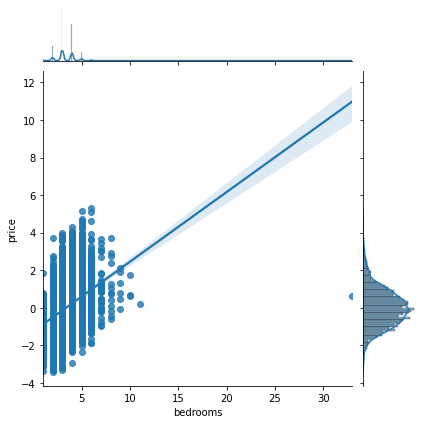

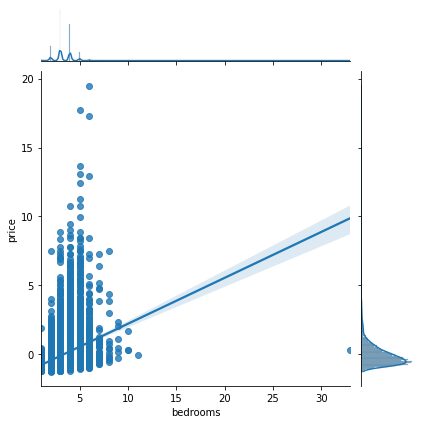

In [69]:
#baseline scaled visualizatoin
sns.jointplot('bedrooms','price', data=baseline_scaled, kind='reg')

#log-scaled visualization
sns.jointplot('bedrooms','price', data=preprocessed, kind='reg');


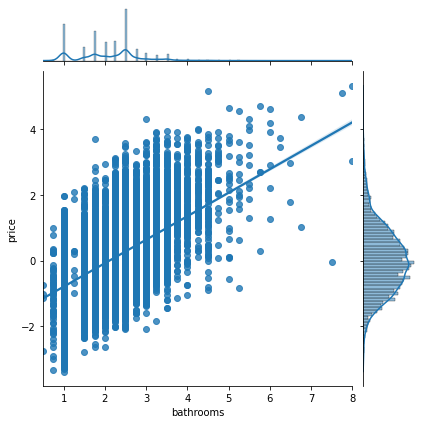

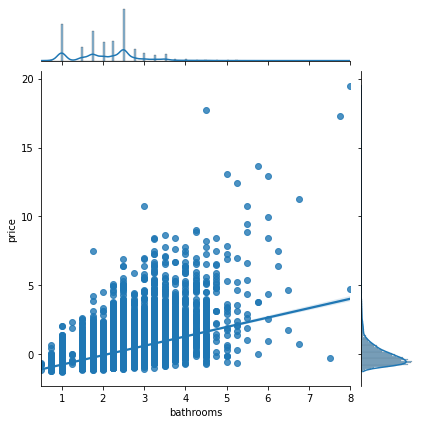

In [71]:
#baseline_scaled visualization for bathrooms and price
sns.jointplot('bathrooms','price', data=baseline_scaled, kind='reg')

#log-scaled visualization for bathrooms and price
sns.jointplot('bathrooms','price', data=preprocessed, kind='reg');

''

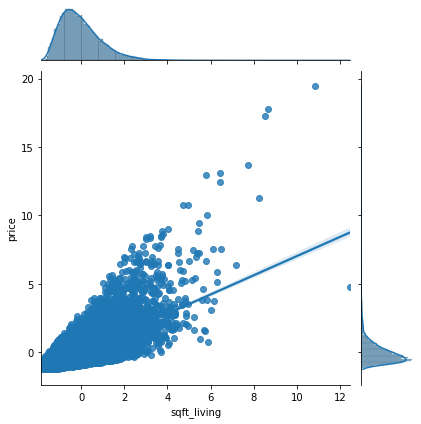

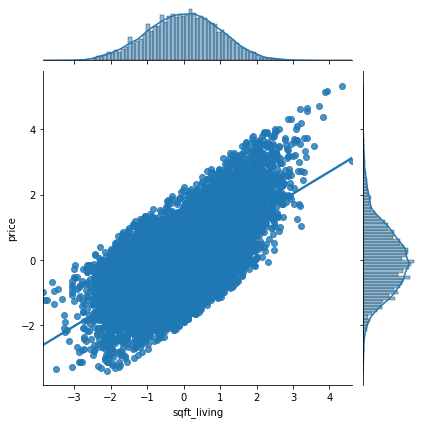

In [72]:
#baseline scaled visualization for sqft_living
sns.jointplot('sqft_living','price', data=baseline_scaled, kind='reg')
#log-scaled visualization for sqft_living
sns.jointplot('sqft_living','price', data=preprocessed, kind='reg');

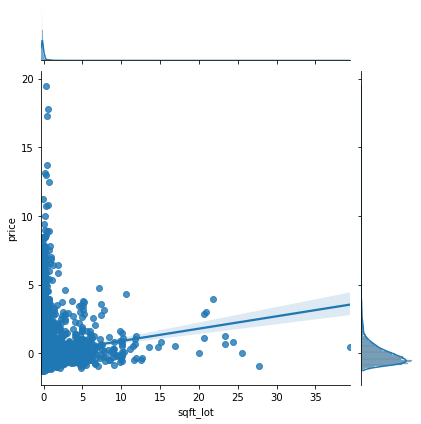

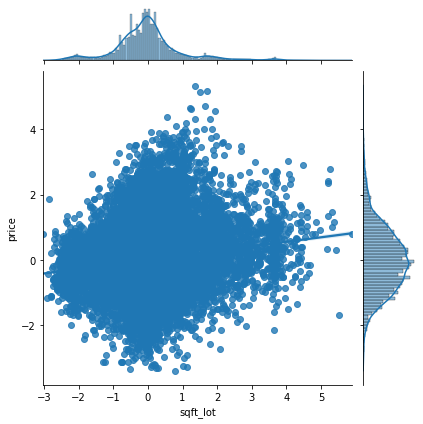

In [73]:
#basline scaled visualization for sqft_lot
sns.jointplot('sqft_lot','price', data=baseline_scaled, kind='reg')
#log-scaled visualization
sns.jointplot('sqft_lot','price', data=preprocessed, kind='reg');

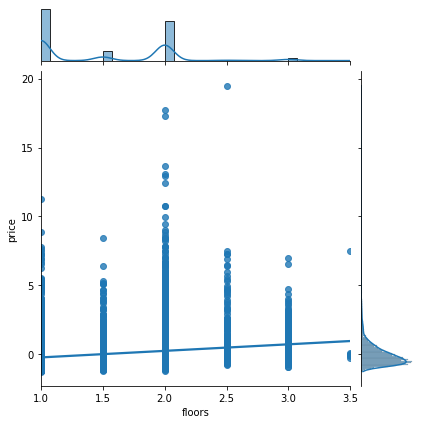

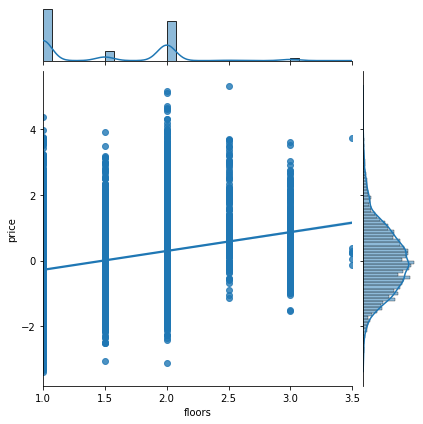

In [74]:
#baseline scaled visualization for floors
sns.jointplot('floors','price', data=baseline_scaled, kind='reg')
#log-scaled visualization
sns.jointplot('floors','price', data=preprocessed, kind='reg');

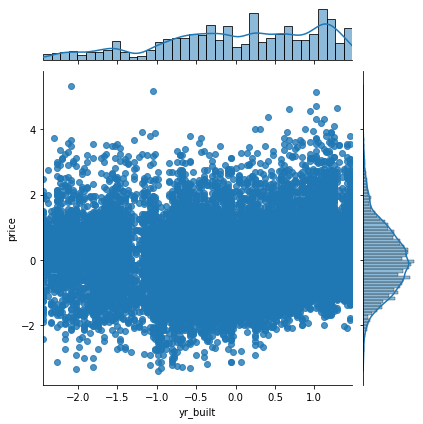

In [59]:
sns.jointplot('yr_built','price', data=preprocessed, kind='reg');

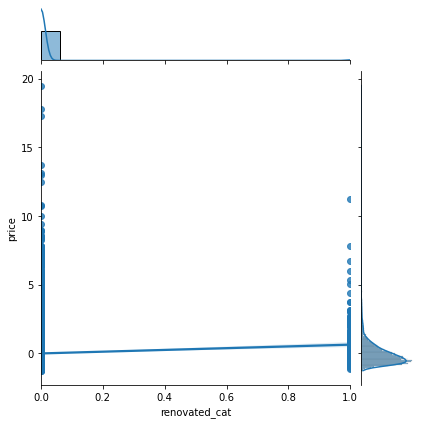

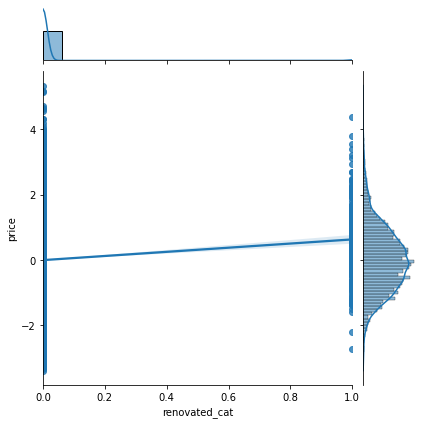

In [75]:
#baseline scaled visual for renovated category
sns.jointplot('renovated_cat','price', data=baseline_scaled, kind='reg')

#log-scaled visualization
sns.jointplot('renovated_cat','price', data=preprocessed, kind='reg');

### Checking for Multicollinearity 

**Using seaborn heatmapping, two features appear to be correlated:**

1.) *bathrooms* and *sqft_living* (r=.76), 

2.) *bedrooms and sqft_living* (r=.62). 

<u>Note:</u> although bedrooms and sqft_living fall below r >.65, they were still included since it was within 3%. 

These two correlations with *sqft_living* make sense. As the number of bedrooms or bathrooms increase, so too does the square footage of a house. More bathrooms or bedrooms equals more square footage.

In [62]:
#columns of predictor variables.
columns = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
           'yr_built', 'renovated_cat']

preprocessed_pred = preprocessed[columns]

#producing correlations b/w predictor variables
corr = preprocessed_pred.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,renovated_cat
price,1.000000,0.343360,0.551249,0.674802,0.138261,0.310630,0.078987,0.065907
bedrooms,0.343360,1.000000,0.514508,0.621820,0.184922,0.177944,0.155732,0.024005
bathrooms,0.551249,0.514508,1.000000,0.762135,0.100624,0.502582,0.505600,0.042377
sqft_living,0.674802,0.621820,0.762135,1.000000,0.325983,0.367564,0.348973,0.026956
sqft_lot,0.138261,0.184922,0.100624,0.325983,1.000000,-0.237460,-0.004421,-0.015453
floors,0.310630,0.177944,0.502582,0.367564,-0.237460,1.000000,0.485463,-0.009579
yr_built,0.078987,0.155732,0.505600,0.348973,-0.004421,0.485463,1.000000,-0.096727
renovated_cat,0.065907,0.024005,0.042377,0.026956,-0.015453,-0.009579,-0.096727,1.000000


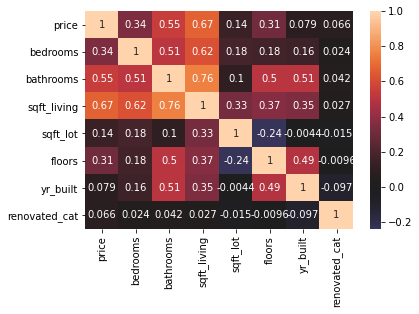

In [63]:
#sns heatmap to visually inspect possible correlations 
sns.heatmap(corr, center=0, annot=True);

## Data Modeling and Evaluation

### Creating Baseline Model

For the baseline model, the scaled, one-hot encoded data will be used. Since scaling (via normalization) should not effect the R-squared score, the model should not differ from the non-scaled data. One-hot encoded variables were also included since encoding is necessary for the model to run properly.

In [77]:
outcome = baseline_scaled['price']
price_predictors = baseline_scaled.drop('price', axis=1)

In [80]:
#adding a constant in order to attain y-intecept coefficient
predictors = sm.add_constant(price_predictors)

In [85]:
#creating baseline model

baseline_model = sm.OLS(outcome, predictors).fit()

In [86]:
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     1801.
Date:                Sun, 30 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:11:47   Log-Likelihood:                -19388.
No. Observations:               21597   AIC:                         3.882e+04
Df Residuals:                   21574   BIC:                         3.900e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -18.1095      8.221     -2.203      0.028     -34.223      -1.996
sqft_living             0.3820      0.009     44.589      0.000       0.365       0.399
yr_built               -0.2817      0.006    -48.198      0.000      -0.293      -0.270
sqft_lot               -0.0293      0.004     -7.020      0.000      -0.037      -0.021
bedrooms               -0.0917      0.006    -16.118      0.000      -0.103      -0.081
bathrooms               0.1521      0.010     15.965      0.000       0.133       0.171
zipcode                 0.0002   8.38e-05      2.297      0.022    2.82e-05       0.000
floors                  0.0778      0.010      8.101      0.000       0.059       0.097
renovated_cat           0.2324      0.040      5.861      0.000       0.155       0.310
grade_11 Excellent      0.7745      0.035     21.994      0.000       0.705       0.844
grade_12 Luxury         2.1866      0.067     32.562      0.000       2.055       2.318
grade_13 Mansion        5.1771      0.169     30.705      0.000       4.847       5.508
grade_3 Poor           -1.6323      0.595     -2.743      0.006      -2.799      -0.466
grade_4 Low            -1.4991      0.118    -12.700      0.000      -1.731      -1.268
grade_5 Fair           -1.5224      0.047    -32.414      0.000      -1.614      -1.430
grade_6 Low Average    -1.4037      0.029    -48.595      0.000      -1.460      -1.347
grade_7 Average        -1.1774      0.024    -49.635      0.000      -1.224      -1.131
grade_8 Good           -0.9160      0.022    -42.120      0.000      -0.959      -0.873
grade_9 Better         -0.5184      0.022    -23.864      0.000      -0.561      -0.476
condition_Fair         -0.0769      0.046     -1.657      0.098      -0.168       0.014
condition_Good          0.0618      0.010      6.043      0.000       0.042       0.082
condition_Poor         -0.0345      0.111     -0.310      0.757      -0.253       0.184
condition_Very Good     0.1701      0.016     10.434      0.000       0.138       0.202
==============================================================================
Omnibus:                    14490.522   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           654232.843
Skew:                           2.657   Prob(JB):                         0.00
Kurtosis:                      29.435   Cond. No.                     1.99e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model #2: Log-scaled Data

In [87]:
outcome = preprocessed['price']
price_predictors = preprocessed.drop('price', axis=1)

predictors = sm.add_constant(price_predictors)

model_2 = sm.OLS(outcome, predictors).fit()

In [88]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     1752.
Date:                Sun, 30 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:14:12   Log-Likelihood:                -19580.
No. Observations:               21597   AIC:                         3.921e+04
Df Residuals:                   21574   BIC:                         3.939e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -41.5968      8.501     -4.893      0.000     -58.258     -24.935
sqft_living             0.3612      0.009     41.230      0.000       0.344       0.378
yr_built               -0.3275      0.006    -55.825      0.000      -0.339      -0.316
sqft_lot               -0.0655      0.005    -13.025      0.000      -0.075      -0.056
bedrooms               -0.0797      0.006    -13.630      0.000      -0.091      -0.068
bathrooms               0.1562      0.010     16.281      0.000       0.137       0.175
zipcode                 0.0004   8.67e-05      4.996      0.000       0.000       0.001
floors                  0.0773      0.010      7.557      0.000       0.057       0.097
renovated_cat           0.1414      0.040      3.536      0.000       0.063       0.220
grade_11 Excellent      0.4293      0.035     12.216      0.000       0.360       0.498
grade_12 Luxury         0.9414      0.067     14.136      0.000       0.811       1.072
grade_13 Mansion        1.3307      0.168      7.914      0.000       1.001       1.660
grade_3 Poor           -1.6402      0.601     -2.731      0.006      -2.818      -0.463
grade_4 Low            -2.0700      0.120    -17.261      0.000      -2.305      -1.835
grade_5 Fair           -2.0978      0.048    -43.779      0.000      -2.192      -2.004
grade_6 Low Average    -1.8104      0.029    -62.462      0.000      -1.867      -1.754
grade_7 Average        -1.3751      0.023    -60.023      0.000      -1.420      -1.330
grade_8 Good           -0.9285      0.021    -44.184      0.000      -0.970      -0.887
grade_9 Better         -0.4196      0.022    -19.391      0.000      -0.462      -0.377
condition_Fair         -0.2712      0.047     -5.790      0.000      -0.363      -0.179
condition_Good          0.0574      0.010      5.559      0.000       0.037       0.078
condition_Poor         -0.1963      0.112     -1.747      0.081      -0.417       0.024
condition_Very Good     0.1683      0.016     10.235      0.000       0.136       0.201
==============================================================================
Omnibus:                       89.573   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.142
Skew:                           0.020   Prob(JB):                     1.82e-27
Kurtosis:                       3.368   Cond. No.                     2.04e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Conclusions

## Next Steps

* **Author:** Kevin Culver
* **Student pace:** self paced
* **Scheduled project review date/time:**  TBD
* **Instructor name:**  Abhineet Kulkarni
* **Blog post URL:** TBD